In [ ]:
# general imports
import os
import urllib.request
# for the data
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# seaborn
import seaborn as sns
# ggplot
from plotnine import *
# altair
import altair as alt
# plotly
import plotly.express as px

# The Data

This is a completely fake set of data. It is meant to represent the relationship between age and experience on earnings, but all data is made up.

In [ ]:
data_url = "https://raw.githubusercontent.com/thetestspecimen/notebooks/main/datasets/earnings_syn/earnings.csv"
urllib.request.urlretrieve(data_url, 'earnings.csv')

('earnings.csv', <http.client.HTTPMessage at 0x7cb71e3f30d0>)

In [ ]:
earnings = pd.read_csv('earnings.csv')

In [ ]:
earnings

,age,field,experience,earnings
0,41,Creative,23,50900
1,52,Technical,15,17900
2,42,Creative,23,9200
3,33,Technical,13,26300
4,59,Technical,34,108500
...,...,...,...,...
95,26,Creative,8,12200
96,38,Creative,20,29300
97,33,Technical,5,22100
98,58,Creative,25,13100


In [ ]:
earnings.describe()

,age,experience,earnings
count,100.00000,100.00000,100.00000
mean,42.27000,13.99000,45176.00000
std,13.43586,10.98989,52852.77459
min,20.00000,0.00000,8000.00000
25%,30.00000,5.75000,12125.00000
50%,43.50000,10.50000,22700.00000
75%,54.50000,23.00000,56375.00000
max,64.00000,39.00000,308000.00000


# Simple Matplotlib

This is an example of a simple implementation of Matplotlib using the "pyplot interface".

This is the method to use for very quick simple plotting with Matplotlib. However, it does lack the flexibility and customisability of the "Axes interface" which uses an Object Oriented Programming (OOP) approach.

For more on the two available Matplotlib interfaces (or APIs) see here:

https://matplotlib.org/stable/api/index.html

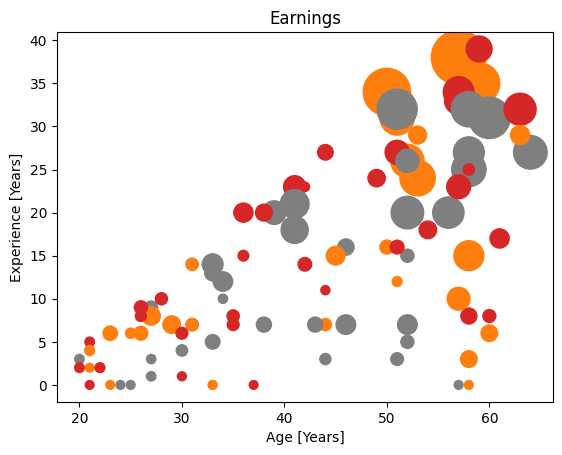

In [ ]:
# matplotlib cannot deal with strings automatically, so we define a colour mapping here
colour_map = {'Management':'tab:orange', 'Creative':'tab:red', 'Technical':'tab:grey'}

plt.scatter(earnings['age'], earnings['experience'], c=earnings['field'].map(colour_map), s=earnings['earnings']/200)
plt.title('Earnings')
plt.xlabel('Age [Years]')
plt.ylabel('Experience [Years]')
plt.show()

# Complex matplotlib

The flexibility of matplotlib is impressive. Every element of the plot can be tuned to produce exactly what you have in mind. However, this can require writing some fairly complex code to acheive in some cases.

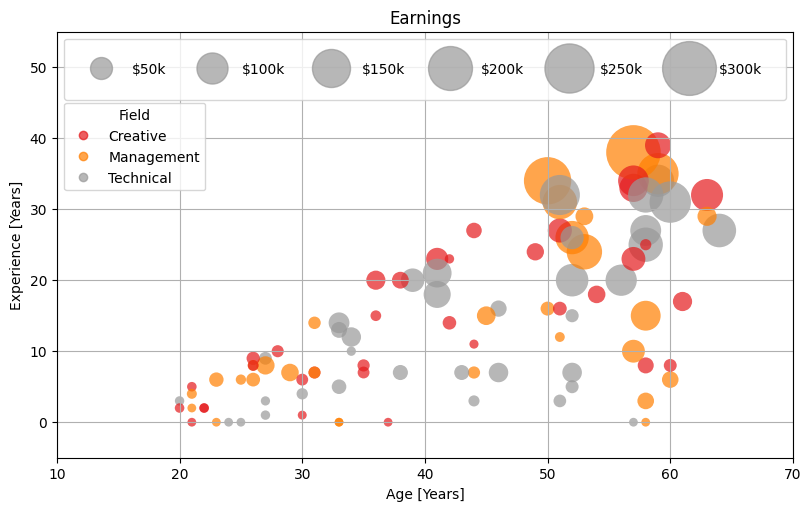

In [ ]:
# matplotlib cannot handle text labels, so encode them as integers
field_encoder = LabelEncoder()
field_labels = field_encoder.fit_transform(earnings['field'])

# create the figure
fig, ax = plt.subplots(figsize=(8,5), dpi=100, layout='constrained')
scatter = ax.scatter(earnings['age'], earnings['experience'], c=field_labels, s=earnings['earnings']/200, alpha=0.7, edgecolors='none', cmap="Set1")
ax.set_title('Earnings')
ax.set_xlabel('Age [Years]')
ax.set_ylabel('Experience [Years]')
ax.set_xlim([10, 70])
ax.set_ylim([-5, 55])
ax.grid(visible=True, which='major', axis='both')

# COLOUR LEGEND
# Extract the legend elements automatically generated by matplotlib
# and convert the labels to the correct text labels
handles, labels = scatter.legend_elements()
label_ints = [int(''.join(i for i in x if i.isdigit())) for x in labels]
labels = field_encoder.inverse_transform(label_ints).tolist()
colour_legend = ax.legend(handles=handles, labels=labels, loc="upper left", title="Field", bbox_to_anchor=(0, 0.85))
ax.add_artist(colour_legend)

# EARNINGS LEGEND
entries = 6
kw = {"prop":"sizes", "num":entries, "color":scatter.cmap(0.9), "fmt":"${x:2g}k", "func":lambda s: s*200/1000}
earnings_legend = ax.legend(*scatter.legend_elements(**kw), loc="upper left", mode="expand", ncols=entries, borderpad=1.7, labelspacing=2, handletextpad=1.2)

plt.show()

# Seaborn

For quick and pretty plots seaborn has a well deserved positive reputation. However, if your requirements are more bespoke you will quickly find limitations.

Then you will find that to get more bespoke, you need to resort to matplotlib anyway!

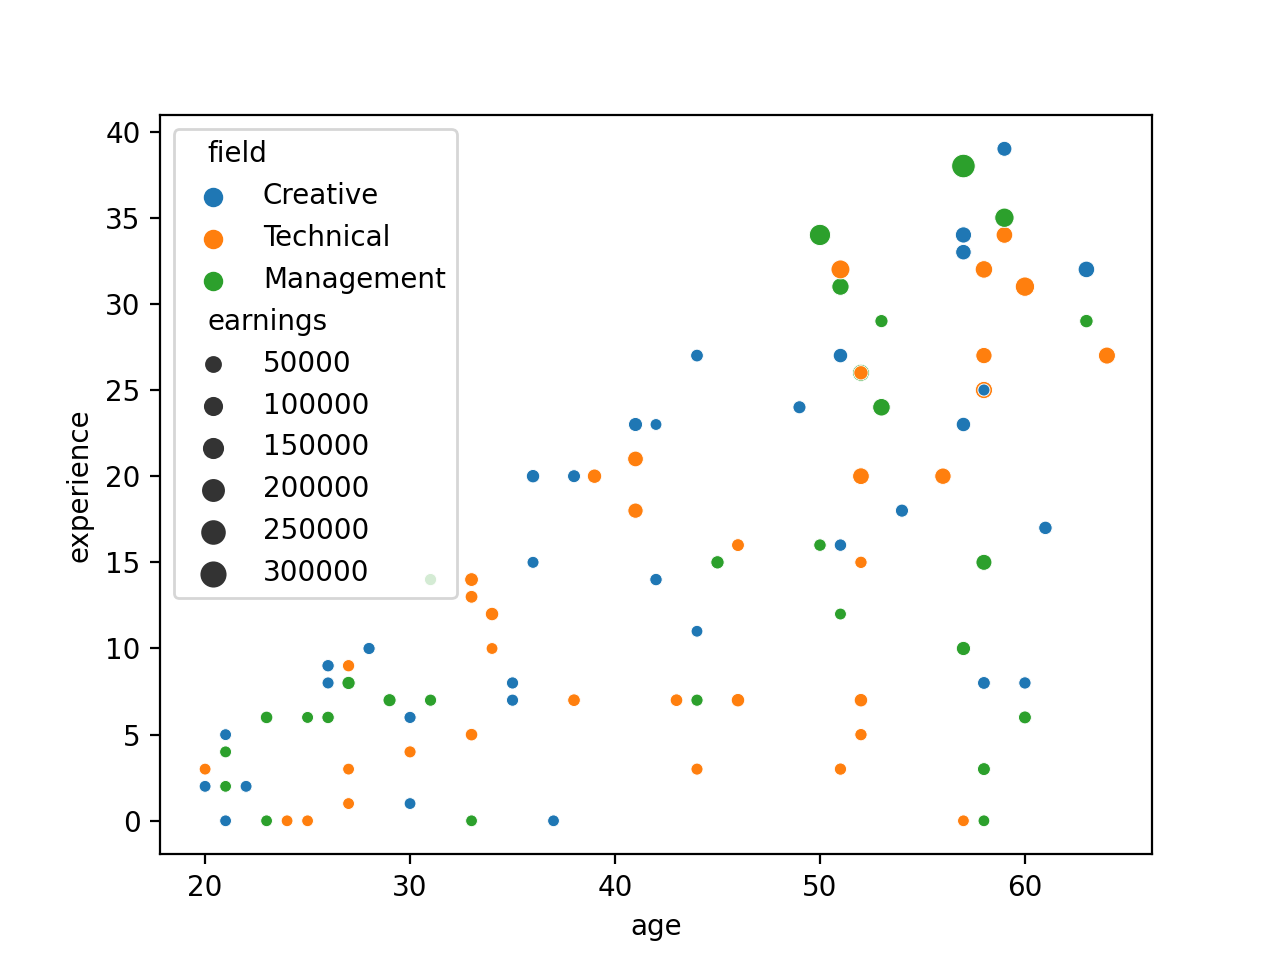

In [ ]:
sns.scatterplot(x="age", y="experience", hue="field", size="earnings", palette="tab10", data=earnings)
plt.show()

As seaborn is based on Matplotlib it is possible to tailor the plots using the exact same methods as used in Matplotlib.

However, due to way some items are rendered it may not be as easy to fully tailor the plot. For example, in the plot below the legend is rendered as a single legend item, and I couldn't find an easy way to fully tailor the legend to avoid the overlap of the earnings circles.

I'm not saying it is impossible, but it certainly isn't obvious how this would be acheived.

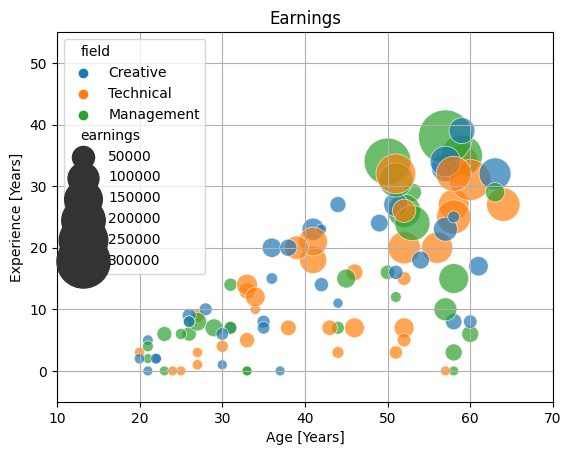

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Earnings')
ax.set_xlabel('Age [Years]')
ax.set_ylabel('Experience [Years]')
ax.set_xlim([10, 70])
ax.set_ylim([-5, 55])
ax.grid(visible=True, which='major', axis='both')

sns.scatterplot(x="age", y="experience", hue="field", size="earnings", sizes=(50, 1500), alpha=0.7, palette="tab10", data=earnings, ax=ax)
plt.show()

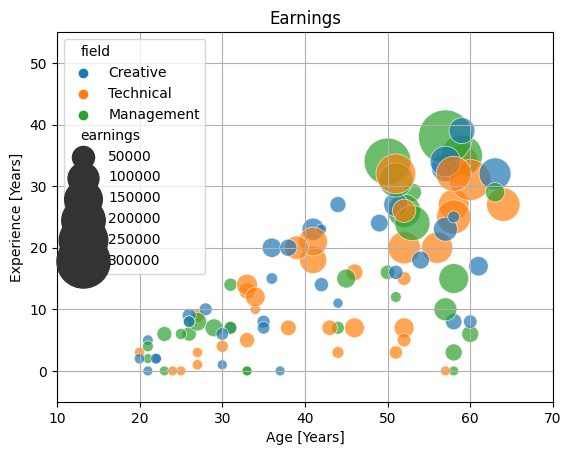

In [ ]:
s_plt = sns.scatterplot(x="age", y="experience", hue="field", size="earnings", sizes=(50, 1500), alpha=0.7, palette="tab10", data=earnings)
s_plt.set_title('Earnings')
s_plt.set_xlabel('Age [Years]')
s_plt.set_ylabel('Experience [Years]')
s_plt.set_xlim([10, 70])
s_plt.set_ylim([-5, 55])
s_plt.grid(visible=True, which='major', axis='both')
plt.show()

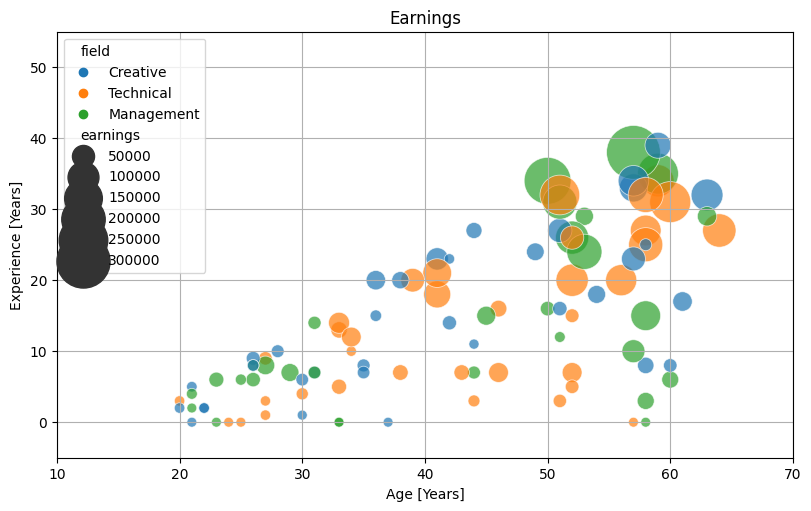

In [ ]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100, layout='constrained')
ax.set_title('Earnings')
ax.set_xlabel('Age [Years]')
ax.set_ylabel('Experience [Years]')
ax.set_xlim([10, 70])
ax.set_ylim([-5, 55])
ax.grid(visible=True, which='major', axis='both')

sns.scatterplot(x="age", y="experience", hue="field", size="earnings", sizes=(50, 1500), alpha=0.7, palette="tab10", data=earnings, ax=ax)
plt.show()

It is possible to use "relplot" to produce a scatterplot, which more directly gives you access to things like plot height and aspect ratio. However, this changes the way you need to interact with the chart compared to directly using scatterplot as relplot is a Figure base plotting method, rather than axis based with Scatterplot. This essentially means that you are digging into the complexities of matplotlib when it comes to customisation in  Seaborn.

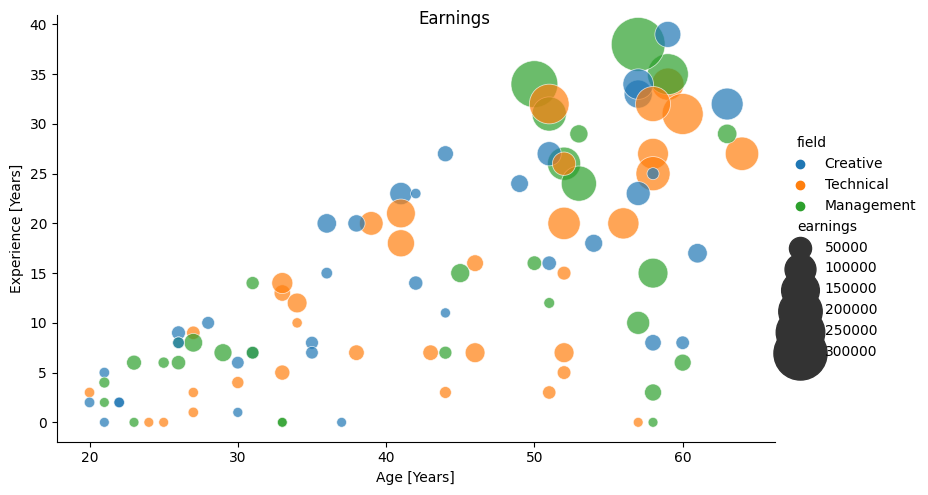

In [ ]:
relplot = sns.relplot(x="age", y="experience", hue="field", size="earnings", kind='scatter', sizes=(50, 1500), alpha=0.7, palette="tab10", height=5, aspect=1.6, data=earnings)
relplot.fig.suptitle('Earnings')
relplot.set_xlabels('Age [Years]')
relplot.set_ylabels('Experience [Years]')
plt.show()

# plotnine

[plotnine](https://plotnine.readthedocs.io/en/v0.12.4/) is based on the library [ggplot2](https://ggplot2.tidyverse.org/), which is used in the R language. The library therefore uses the ["Grammar of Graphics"](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448/ref=as_li_ss_tl) philosophy.

ggplot2 has an excellent reputation (both within the R community, and beyond) of producing elegant plots with simple intuitive inputs. plotnine is also an excellent Python implementation of the R original.

...and guess what the plotting backend of plotnine uses. [Yeah, matplotlib!](https://plotnine.readthedocs.io/en/stable/about-plotnine.html)



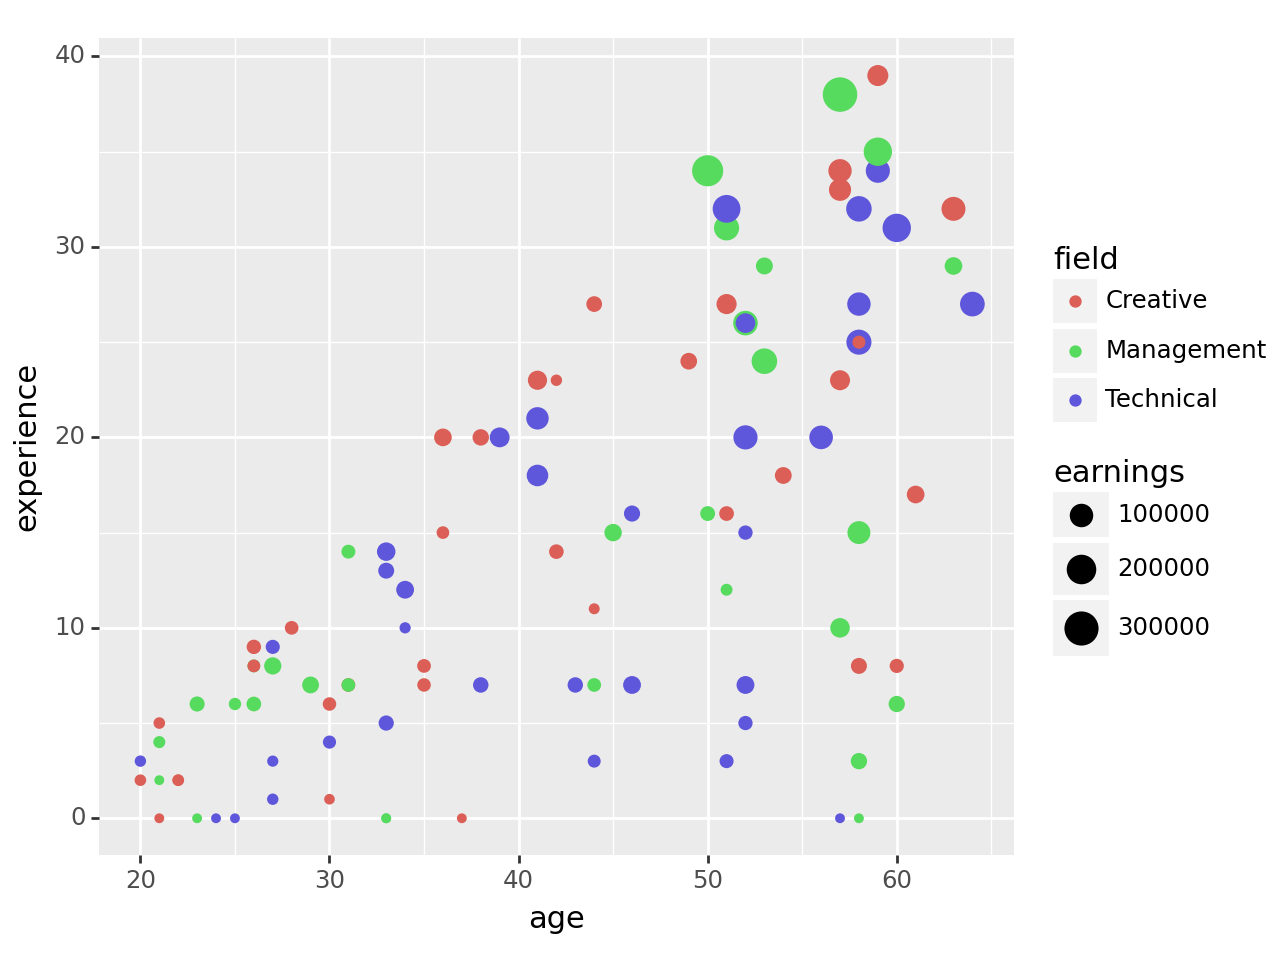

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(earnings)
 + aes(x='age', y='experience', color='field', size='earnings')
 + geom_point()
)

In terms of keeping things simple I think plotnine does a better job than seaborn.

You can also quite easily and intuatively make the plot prettier as per the below. And even with the extra settings the code remains concise and readable.

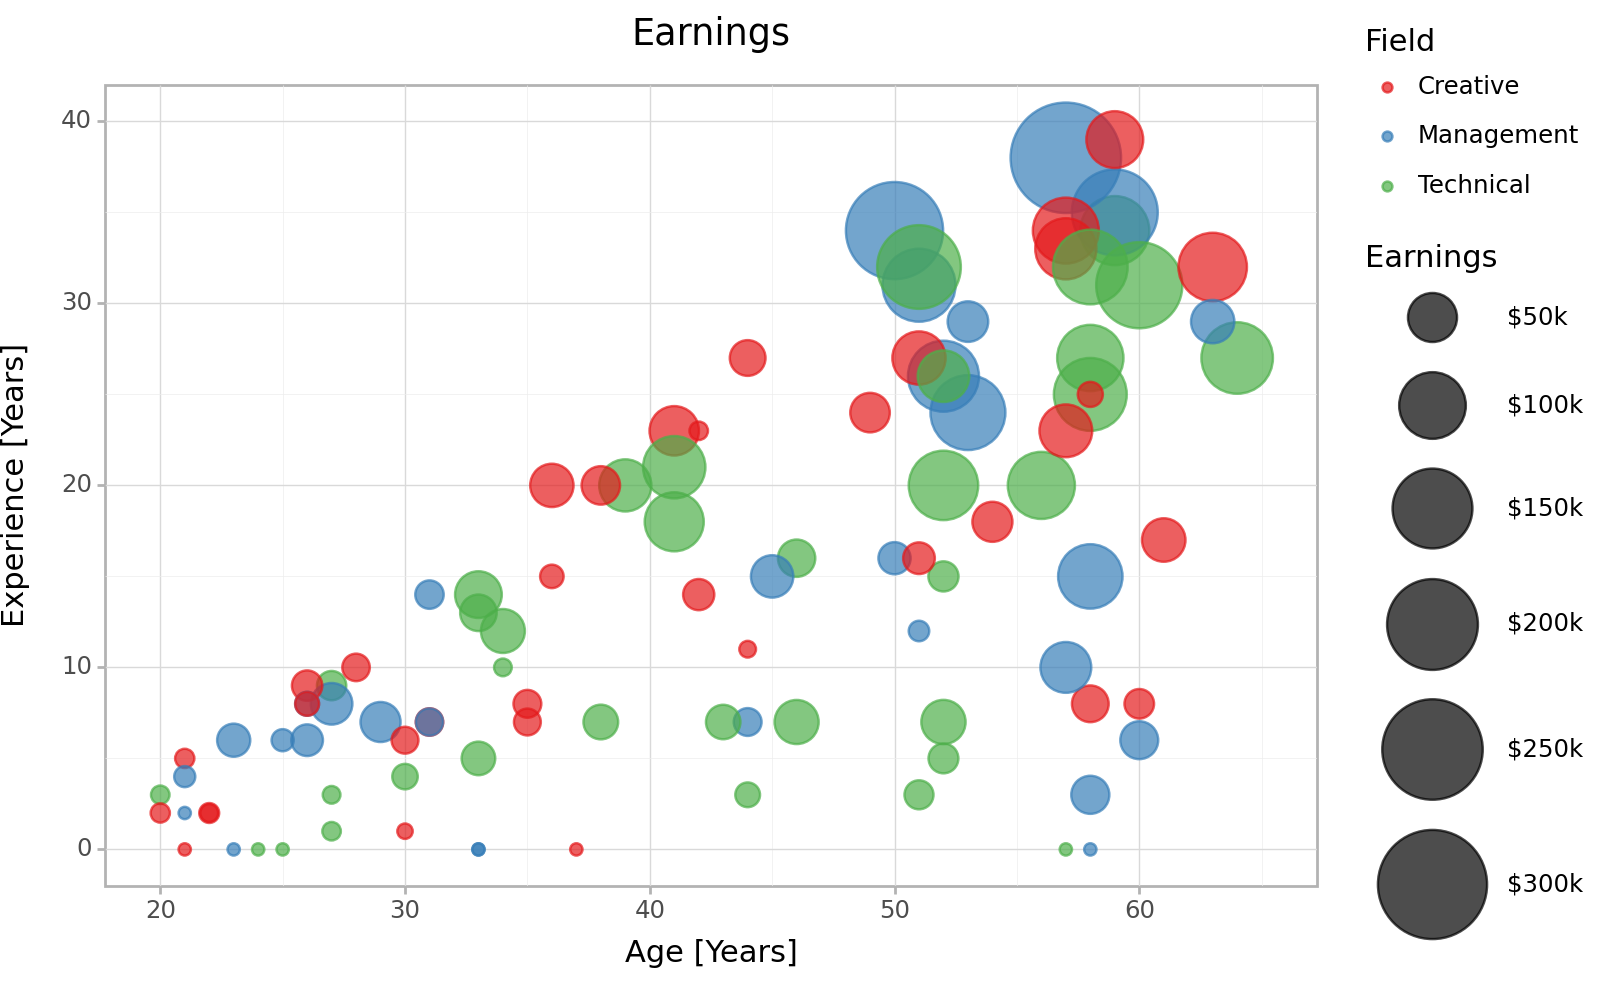

<Figure Size: (800 x 500)>

In [ ]:
(ggplot(earnings)
 + aes(x='age', y='experience', color='field', size='earnings')
 + geom_point(alpha=0.7)
 + scale_x_continuous(limits = (20, 65))
 + scale_y_continuous(limits = (0, 40))
 + labs(title='Earnings', x='Age [Years]', y='Experience [Years]', color='Field', size='Earnings')
 + scale_color_brewer(type="qual", palette="Set1")
 + theme_light()
 + theme(title = element_text(hjust = 0.5), figure_size = (8, 5), legend_key = element_rect(color = "White"))
 + scale_size_continuous(breaks = (50000, 100000, 150000, 200000, 250000, 300000),
                         labels = ("$50k","$100k","$150k","$200k","$250k","$300k"),
                         range = (2,22),
                         limits = (8000,310000))
)

# Vega Altair

Vega Altair is also a great library for simple intuative plotting. It is one of the few that are not based on matplotlib.

It also has the added advantage of being interactive, if you need it to be.

Creating a plot with minimal input actually returns a very impressive plot straight out of the blocks. It is well laid out, well scaled, and has a nicely laid out clear legend.

In [ ]:
alt.Chart(earnings).mark_circle().encode(
    x='age',
    y='experience',
    color='field',
    size='earnings',
)

alt.Chart(...)

Adding a little more customisation is also relatively easy and intuitive, and adding an interactive element is straight forward.

However, there were a few quirks that I think are a negative. For example, setting "tickMinStep=5" causes the grid lines to be out of sync unless the "tickCount" parameter is set. This seems an unnecessary requirement, and should be automatic.

However, overall it is a very impressive library, and should definately be a consideration if interactivity is a requirement.

In [ ]:
alt.Chart(earnings, title="Earnings").mark_circle().encode(
    alt.X('age', axis=alt.Axis(title='Age [Years]', tickMinStep = 5, tickCount=11), scale=alt.Scale(domain=(15,70))),
    alt.Y('experience', axis=alt.Axis(title='Experience [Years]', tickMinStep = 5), scale=alt.Scale(domain=(-5,45))),
    color='field',
    size=alt.Size('earnings', scale=alt.Scale(range=[50, 3000], domain=[8000, 308000])),
    tooltip = [alt.Tooltip('earnings')]
).properties(
    width=700,
    height=400
)

alt.Chart(...)

# Plotly

I have included Plotly as it is very popular. However, as a library for producing static plots I would argue it is lacking. Plotly should only really be a consideration if you need to create great interactive plots.

It could be my lack of knowledge of plotly, but I have no idea to add a second legend for the point sizes. Of course, all the data is there if you hover over the points, but that is not much use if you have a static plot.

In [ ]:
fig = px.scatter(earnings, x="age", y="experience", color="field",
                 size='earnings',hover_data=['earnings'])
fig.show()